In [1]:
#importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv("C:\\Users\\vamsh\\Downloads\\DoctorVisits - DA.csv")

In [3]:
#printing the first 10 rows
df.head(10)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


In [4]:
#printing the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [5]:
#describing the summary statistics of dataset
df.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,0.406385,0.583160,1.431985,0.861850,1.217534
std,1498.368279,0.798134,0.204782,0.368907,1.384152,2.887628,2.124266
min,1.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,0.320000,0.550000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,0.620000,0.900000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


In [6]:
#Finding the count of males and females
df['gender'].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

In [7]:
#Finding the count of people at each illness level
df['illness'].value_counts()

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64

In [8]:
age=list((df['age'].value_counts()).index)
age.sort()
age

[0.19, 0.22, 0.27, 0.32, 0.37, 0.42, 0.47, 0.52, 0.57, 0.62, 0.67, 0.72]

In [9]:
#Calculating number of people at each age group
age_count={}
for i in df['age']:
    if i in age_count.keys():
        age_count[i]+=1
    else:
        age_count[i]=1
age_count

{0.19: 752,
 0.22: 1213,
 0.27: 523,
 0.32: 301,
 0.37: 146,
 0.42: 126,
 0.47: 181,
 0.52: 222,
 0.57: 273,
 0.62: 316,
 0.67: 315,
 0.72: 822}

In [10]:
#Counting the no.of patients at each age group
ill=[]
df1=df.groupby('age')
for i in age_count.keys():
    c=df1.get_group(i)
    ill.append(c['illness'].count())
ill
    

[752, 1213, 523, 301, 146, 126, 181, 222, 273, 316, 315, 822]

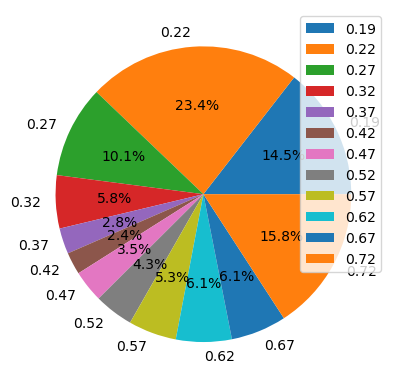

In [11]:
#Pie chart to represent the relation between age and illness
plt.pie(ill,labels=age,autopct='%1.1f%%')
plt.legend(loc='best')
plt.show()

In [12]:
#Calculating the count of visits by male and female
male_counts=female_counts=0
for i in range(len(df)):
    if df.loc[i,'gender']=='male':
        male_counts+=df.loc[i,'visits']
    else:
        female_counts+=df.loc[i,'visits']
    

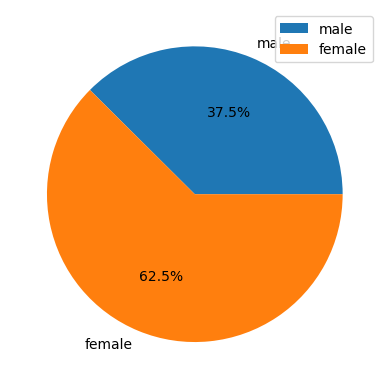

In [13]:
#Pie chart to show the number of visits by male and female
total=[male_counts,female_counts]
label=['male','female']
plt.pie(total,labels=label,autopct='%1.1f%%')
plt.legend()

In [14]:
#Calculating the male and female patients for each age group
female_age_illness=[]
male_age_illness=[]
for i in age:
    p=0
    c=pd.DataFrame(df1.get_group(i))
    k=list(c['gender'].value_counts().values)
    female_age_illness.append(k[1])
    male_age_illness.append(k[0])

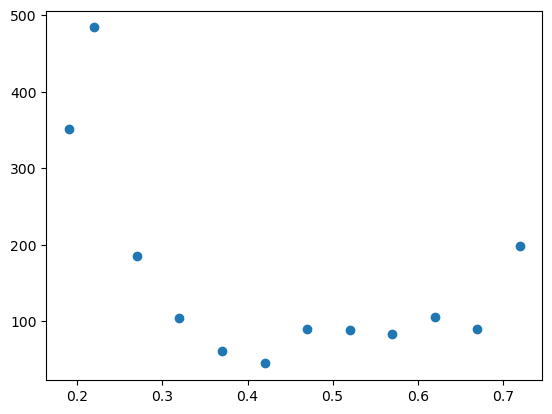

In [15]:
#plot to show number of female patients at each age group
plt.scatter(age,female_age_illness)

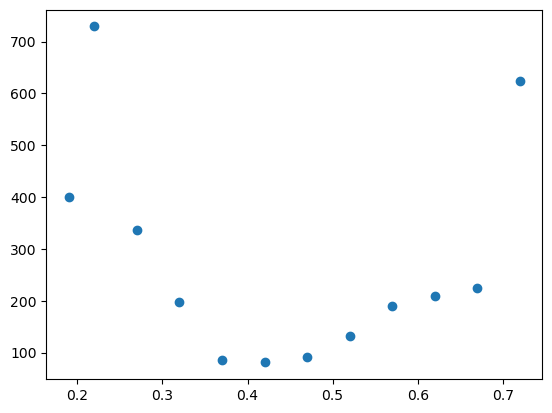

In [16]:
#Plot to show number of male patients at each age group
plt.scatter(age,male_age_illness)

C:\Users\vamsh\AppData\Local\Temp\ipykernel_16480\72965549.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')


<Axes: >

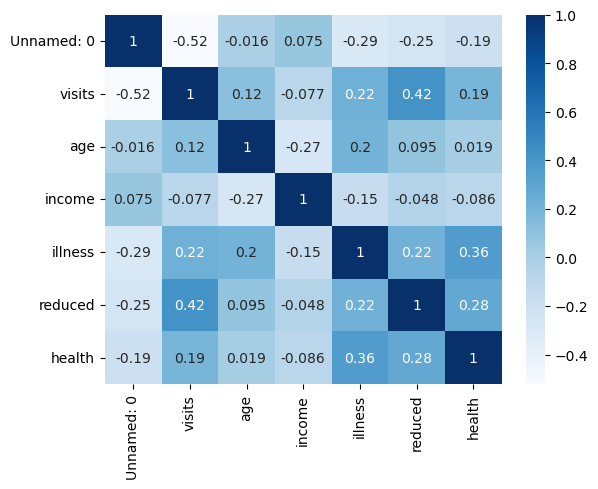

In [17]:
#Plot to show the correlation among all featutes
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [18]:
#Number of days of reduced activity due to illness by gender
Reduced_activity_days_by_gender=df.groupby('gender')['reduced'].sum()
Reduced_activity_days_by_gender

gender
female    2636
male      1837
Name: reduced, dtype: int64

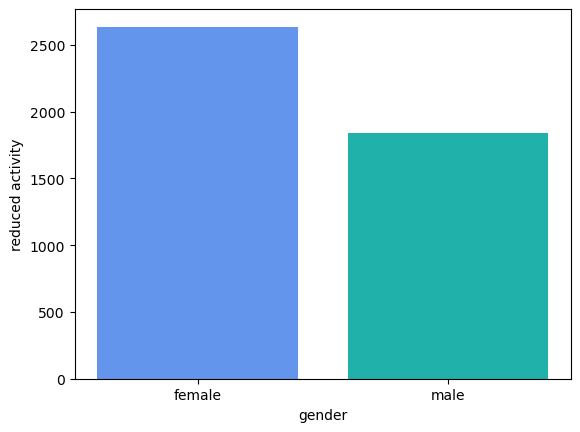

In [19]:
#Bar chart to visualize the reduced activity of male and female due to illness
db = df.groupby('gender')['reduced'].sum().to_frame().reset_index()
plt.bar(db['gender'], db['reduced'], color = ['cornflowerblue', 'lightseagreen'])
plt.xlabel('gender')
plt.ylabel('reduced activity')
plt.show()

<Axes: xlabel='gender', ylabel='Count'>

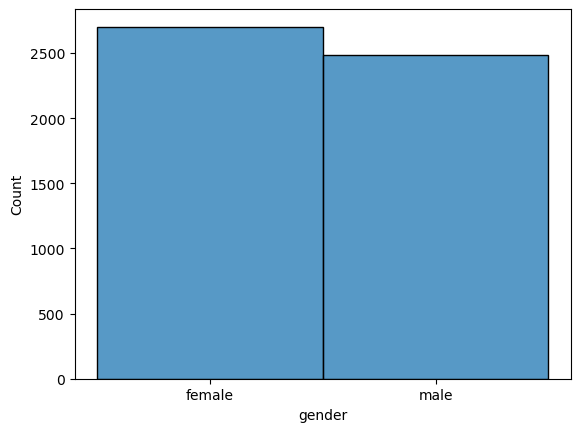

In [20]:
#Total number of males and females affected by the illness
sns.histplot(df['gender'],bins=2)

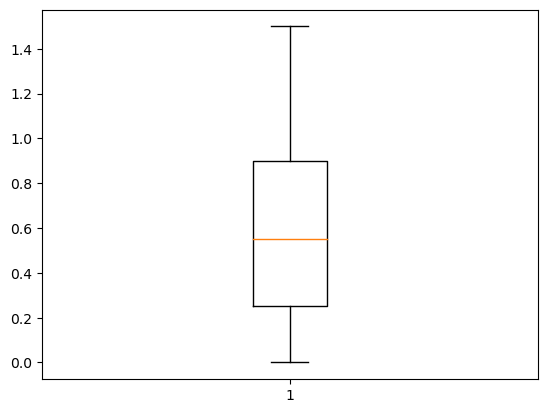

In [21]:
#Analyzing the maximum, minimum and median income
y=list(df.income)
plt.boxplot(y)
plt.show()

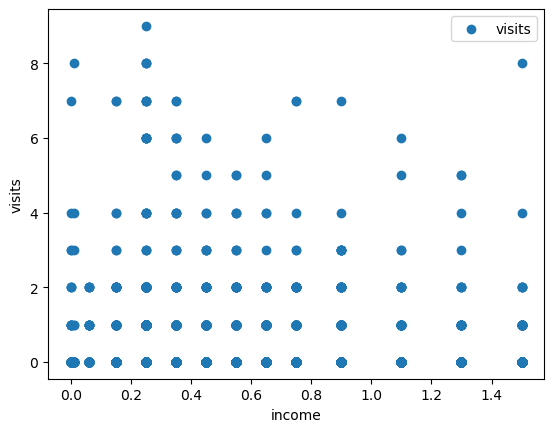

In [22]:
#Analyzing how the income of a person is related to number of visits
plt.scatter(x='income',y='visits',data=df)
plt.xlabel('income')
plt.ylabel('visits')
plt.legend()
plt.show()

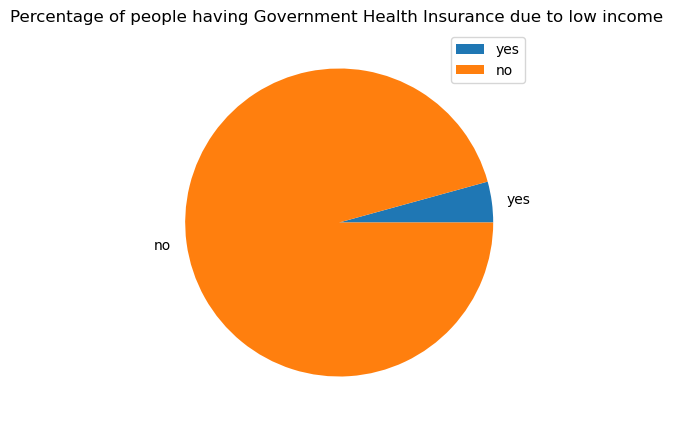

In [23]:
#Pie chart to show how much percentage of people having Government heaalth insurance due to low income
label = ['yes', 'no']
Y = df[df['freepoor']=='yes']
N = df[df['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label)
plt.title("Percentage of people having Government Health Insurance due to low income ")
plt.legend()
plt.show()

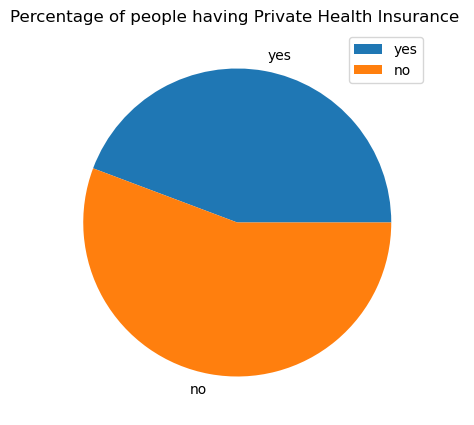

In [24]:
#Analyzing how many people are having private Health Insurance
Y = df[df['private']=='yes']
N = df[df['private']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label)
plt.title("Percentage of people having Private Health Insurance ")
plt.legend()
plt.show()

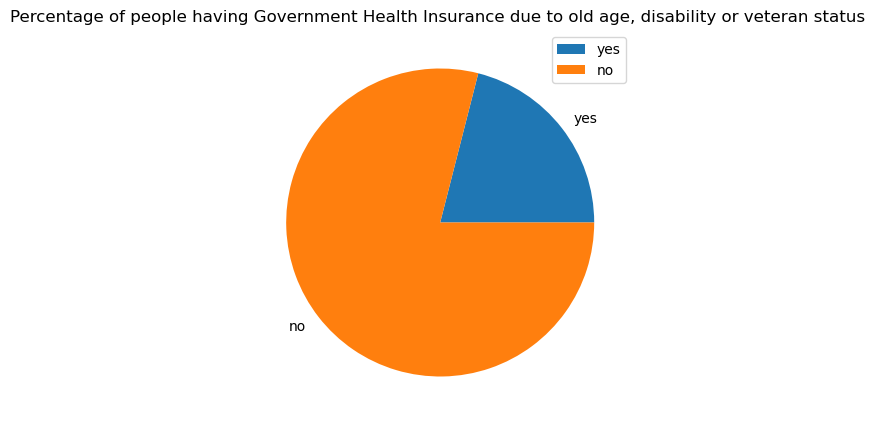

In [25]:
#Analyzing how much percentage of people having Government Insurance due to old age,disability or veteran status
Y = df[df['freerepat']=='yes']
N = df[df['freerepat']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label)
plt.title("Percentage of people having Government Health Insurance due to old age, disability or veteran status ")
plt.legend()
plt.show()